In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=0.3, random_state=2)

In [3]:
def plotDataset(x, y, axes):
    plt.plot(x[y==0, 0], x[y==0, 1], 'ro', markersize=3)
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)

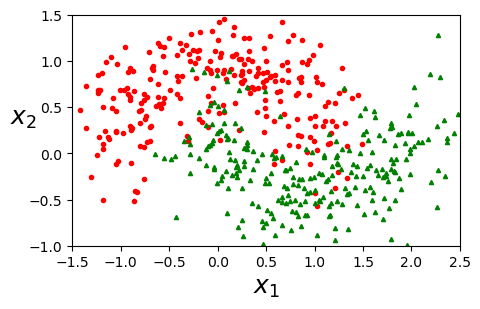

In [4]:
plt.figure(figsize=(5, 3))
plotDataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [6]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

rndClf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=1)

rndClf.fit(xTrain, yTrain)
rndClf.score(xTrain, yTrain)

0.9573333333333334

In [7]:
rndClf.oob_score_

0.9093333333333333

In [8]:
rndClf.score(xTest, yTest)

0.88

In [9]:
#Feature Importances

rndClf.feature_importances_

array([0.38187837, 0.61812163])

In [10]:
#Decision Boundary
def plotDecisionBoundary(clf, x, y, axes=[-1.5, 2.45, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred)
    
    plotDataset(x, y, axes)

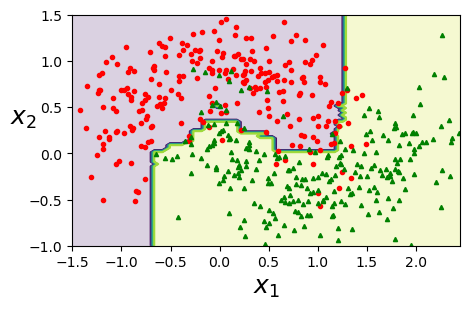

In [11]:
plt.figure(figsize=(5, 3))
plotDecisionBoundary(rndClf, x, y)
plt.show()

In [12]:
#ExtraTreesClsssifier()

from sklearn.ensemble import ExtraTreesClassifier

extClf = ExtraTreesClassifier(random_state=1)
extClf.fit(xTrain, yTrain)
extClf.score(xTest, yTest)

0.864

In [13]:
#Feature importance

extClf.feature_importances_

array([0.42425007, 0.57574993])

In [14]:
np.random.seed(1)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x[:, 0] - 0.5)**2 + np.random.randn(m)/10

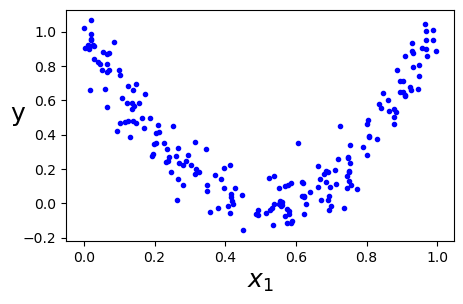

In [15]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', fontsize=18, rotation=0)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [17]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rndReg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=1)
rndReg.fit(xTrain, yTrain)
rndReg.score(xTrain, yTrain)

0.9417364410547316

In [18]:
rndReg.oob_score_

0.8746177182126228

In [19]:
rndReg.score(xTest, yTest)

0.9157119465346966

In [20]:
#Feature importances

rndReg.feature_importances_

array([1.])

In [25]:
#Model

def plotRegressionPredictions(model, x, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    yPred = model.predict(x1)
    
    plt.plot(x, y, 'b.')
    plt.plot(x1, yPred, 'r-', linewidth=2, label='$\hat{y}$')
    
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('y', fontsize=18, rotation=0)
    plt.legend(loc='upper center', fontsize=14)

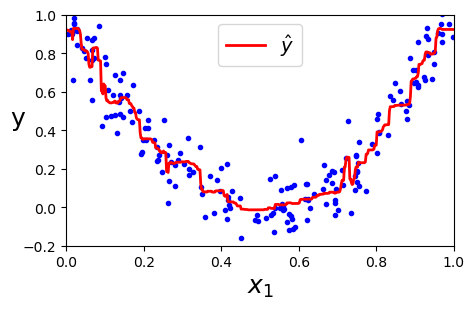

In [26]:
plt.figure(figsize=(5, 3))
plotRegressionPredictions(rndReg, x, y)
plt.show()

In [27]:
#ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

extReg = ExtraTreesRegressor(random_state=1)
extReg.fit(xTrain, yTrain)
extReg.score(xTest, yTest)

0.8723823510592347

In [28]:
extReg.feature_importances_

array([1.])